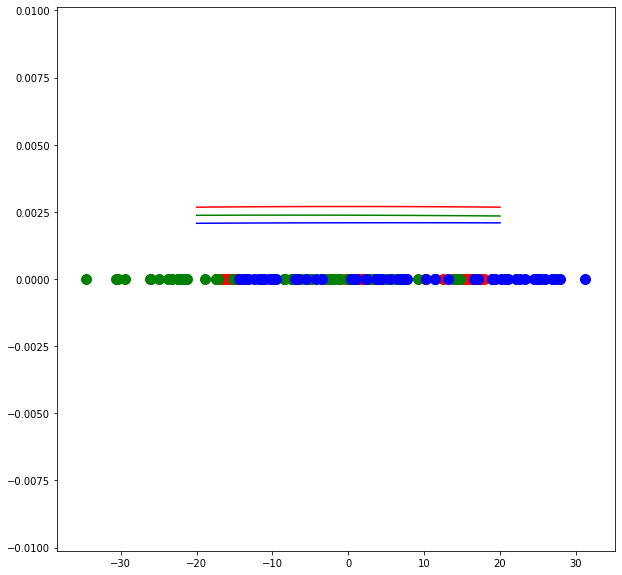

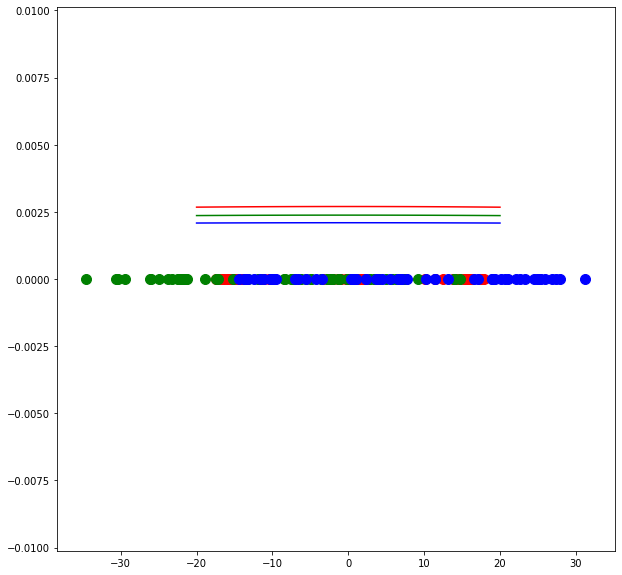

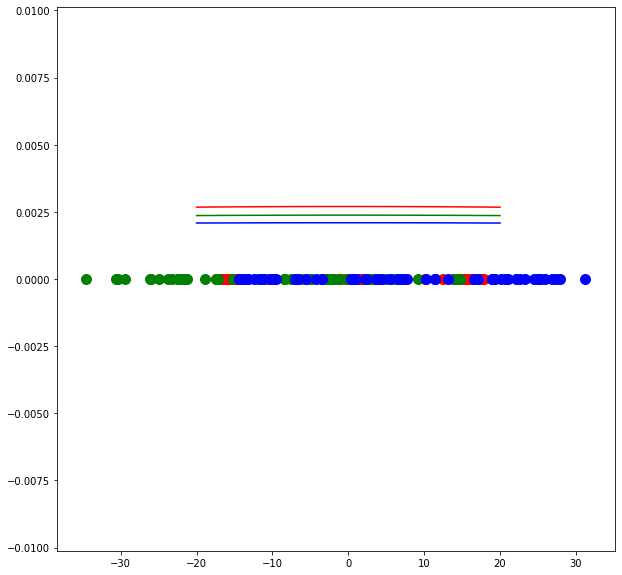

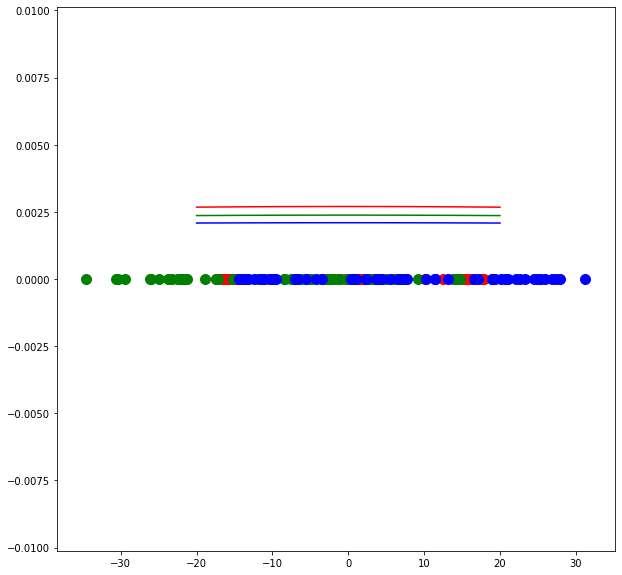

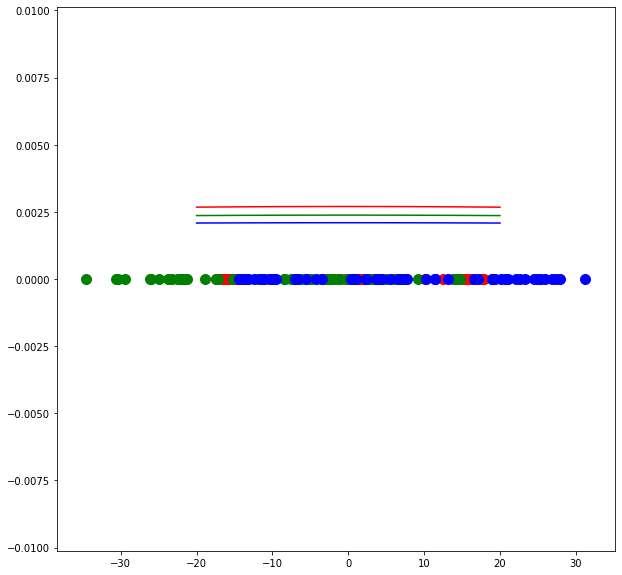

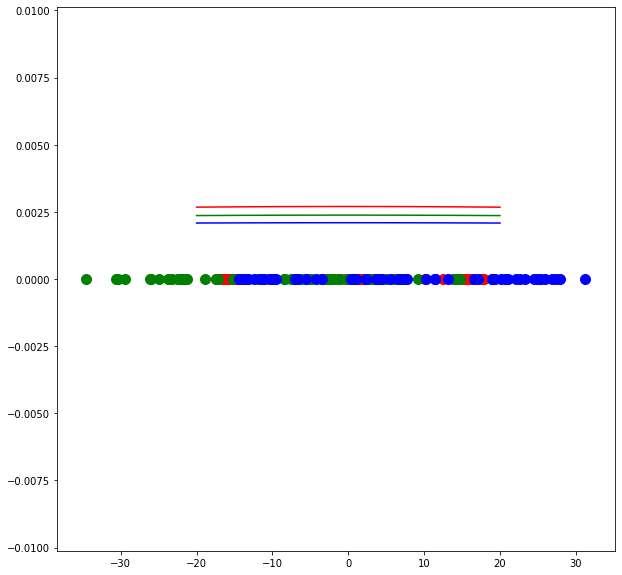

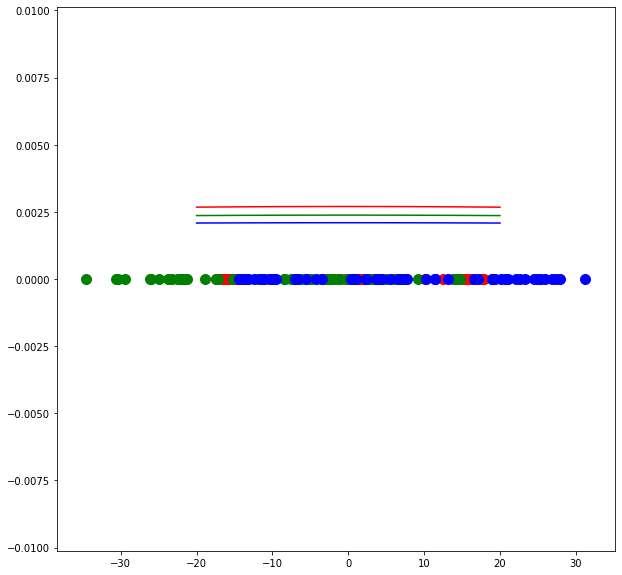

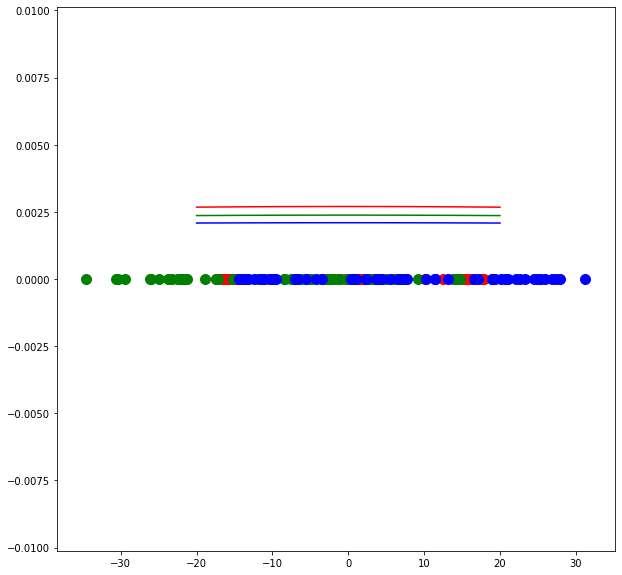

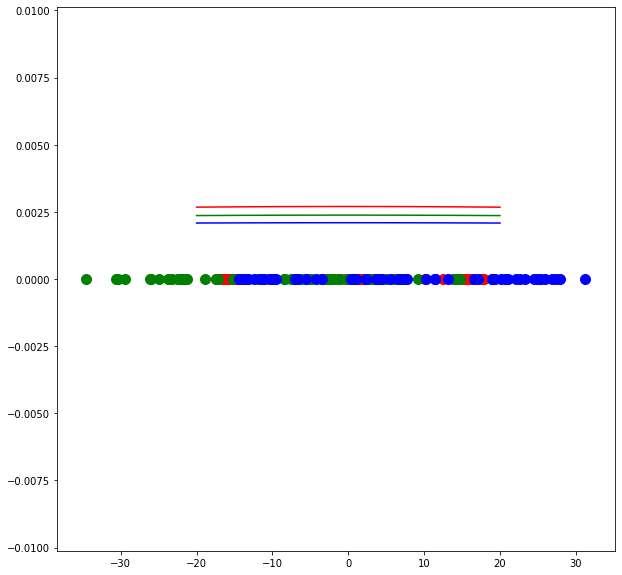

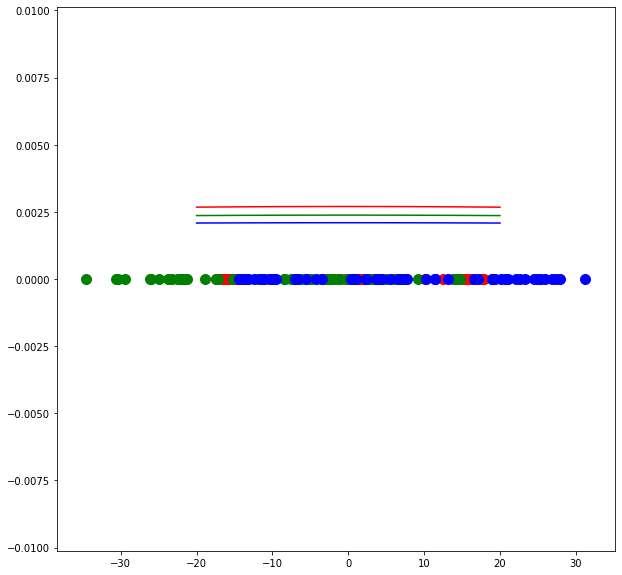

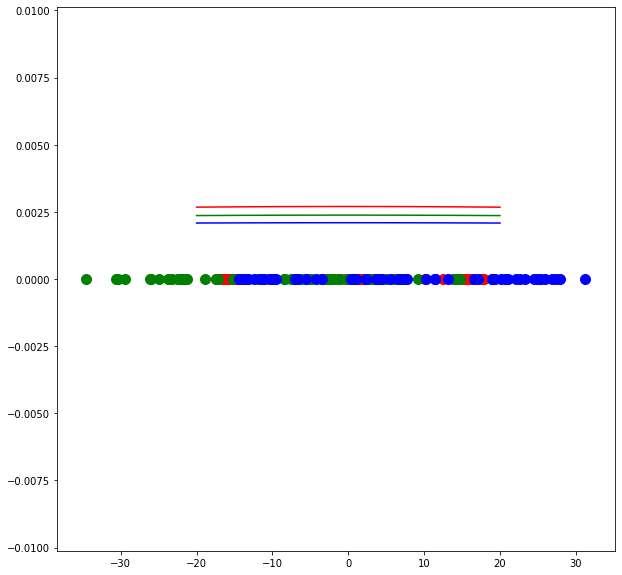

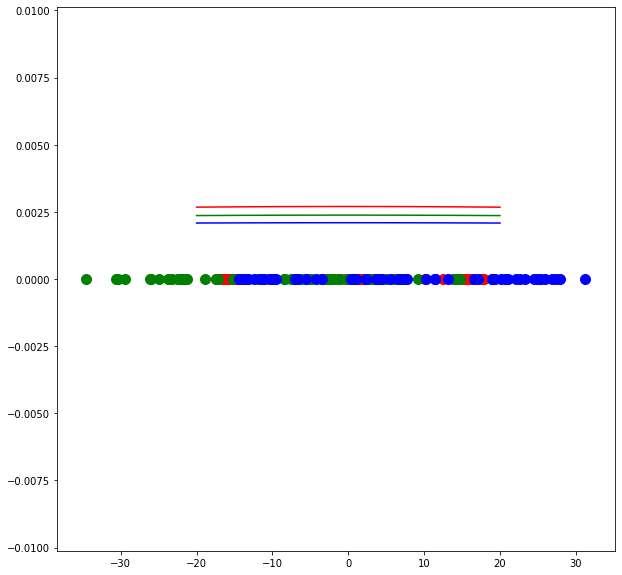

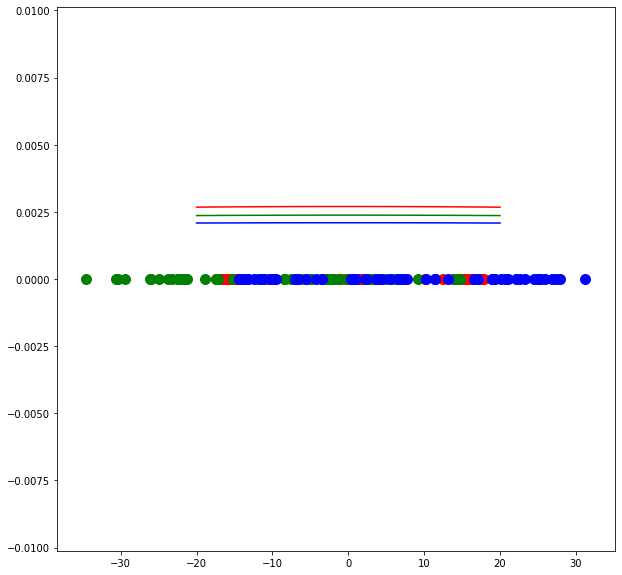

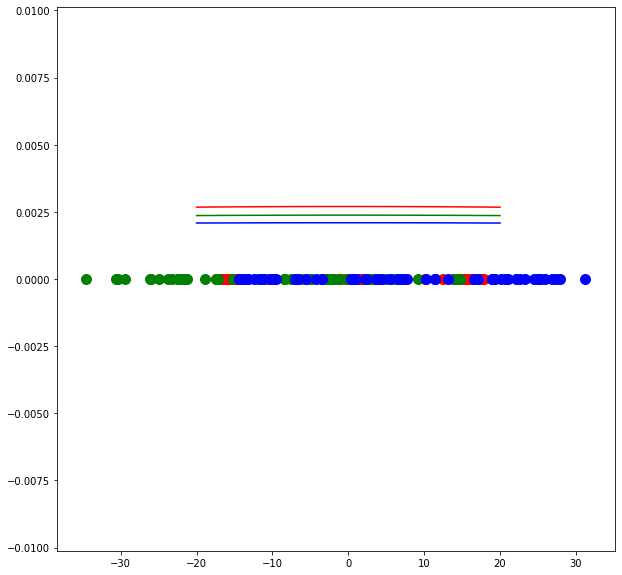

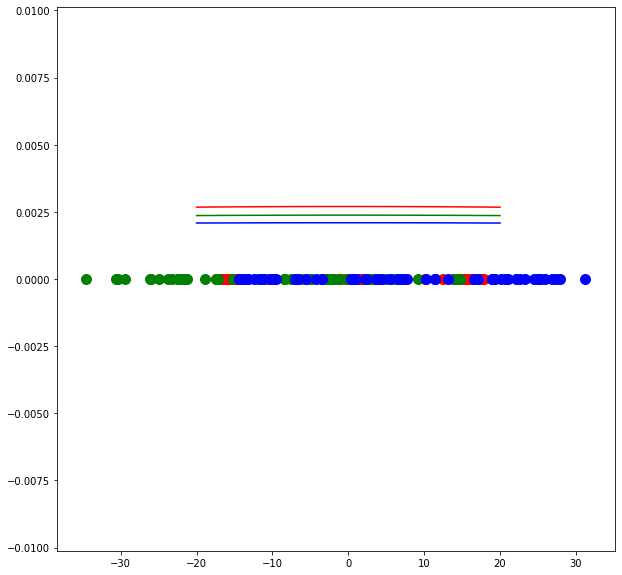

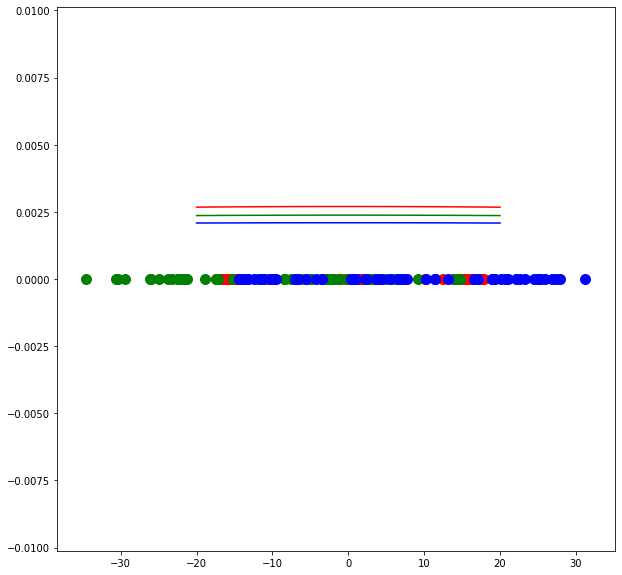

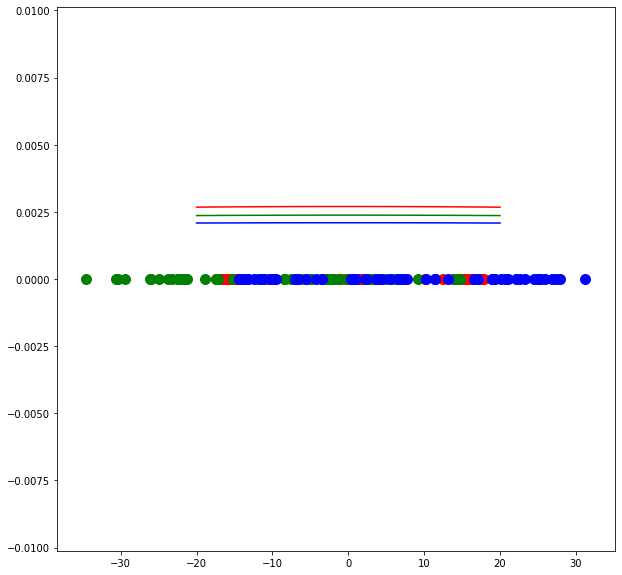

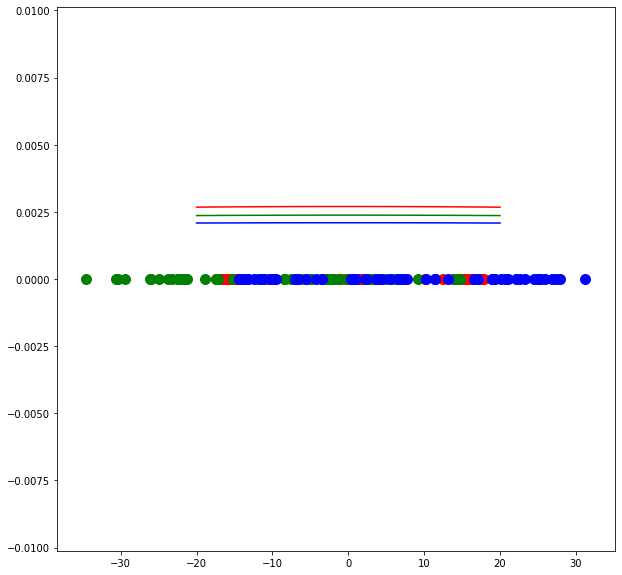

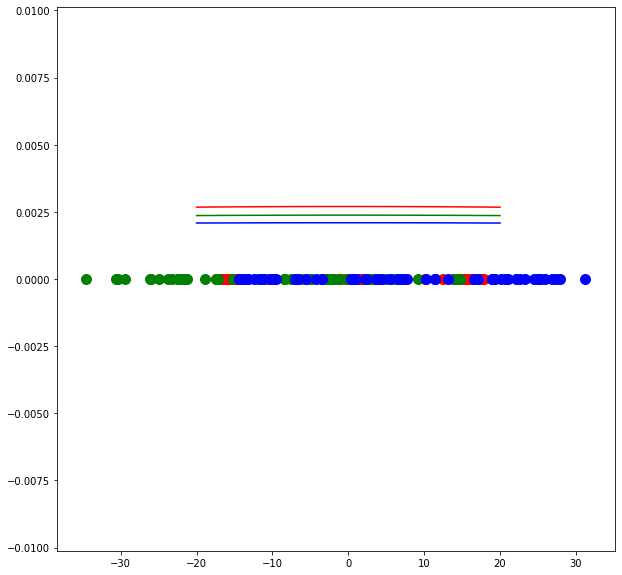

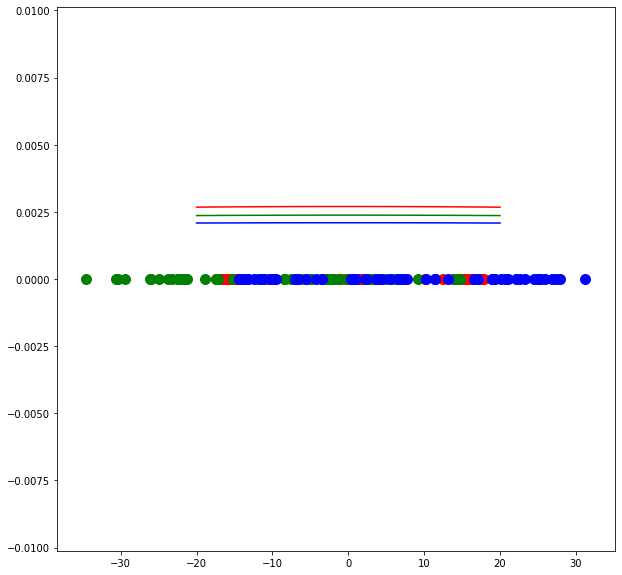

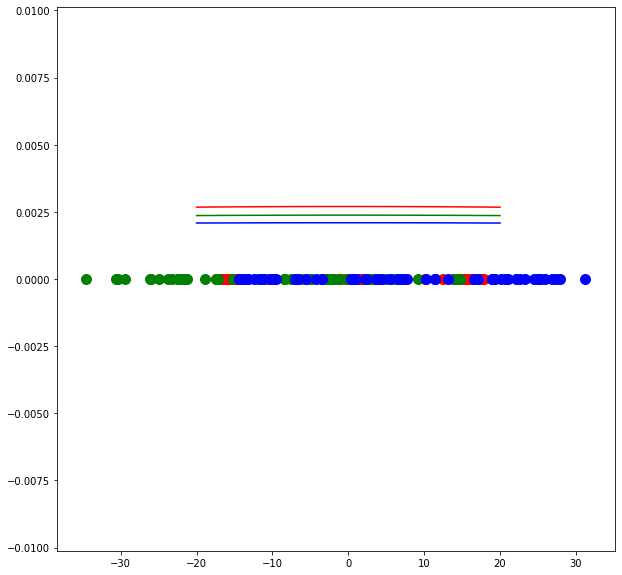

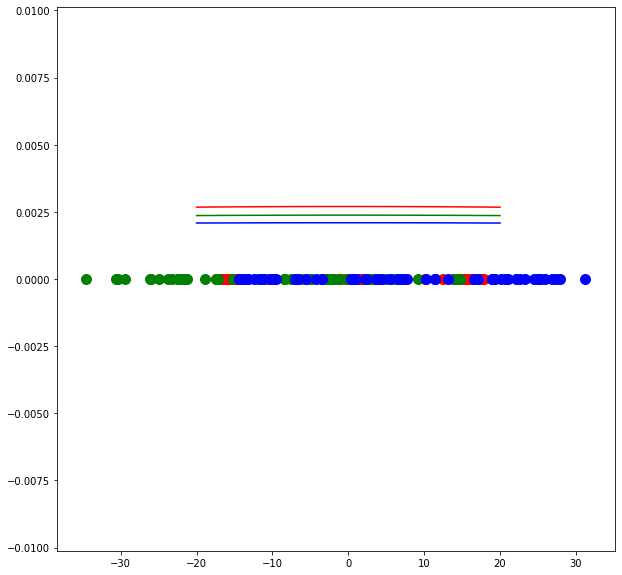

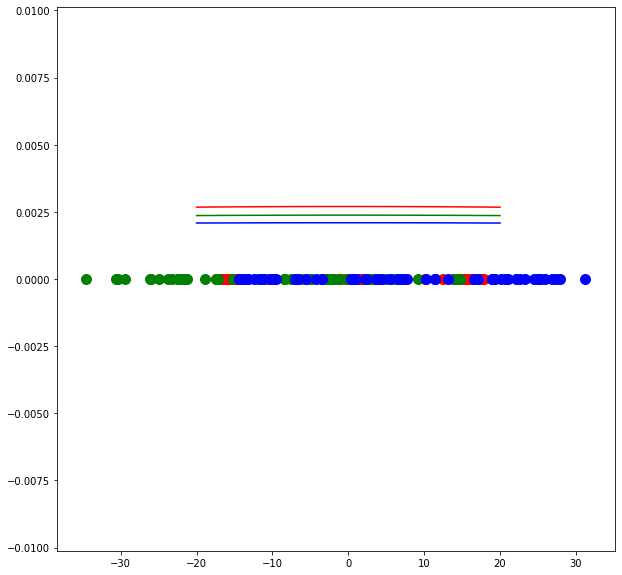

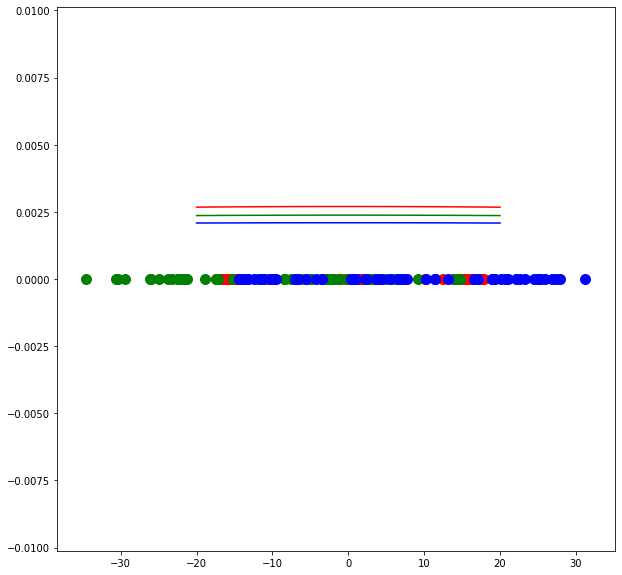

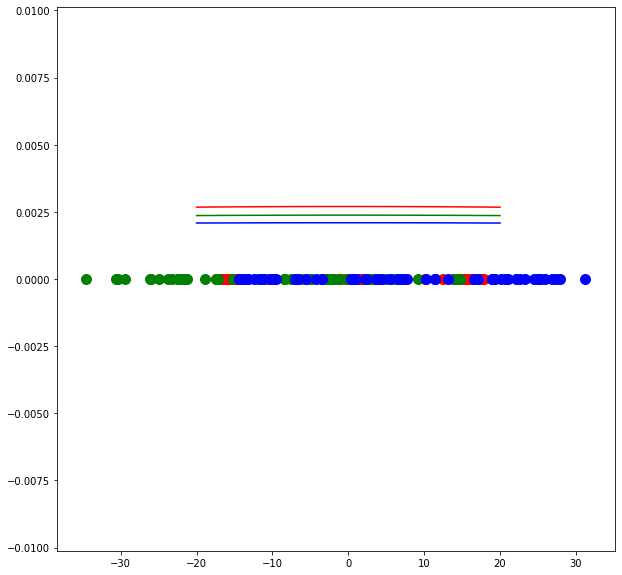

In [8]:
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger 
matplotlib_axes_logger.setLevel('ERROR')
from matplotlib import style
import numpy as np
from scipy.stats import norm
import pickle

np.random.seed(0)

def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
        """initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f] """    
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
    
    """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(self.X)
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        for i in range(len(r)):
        	# Write code here
            r[i] = r[i]/(np.sum(self.pi)*np.sum(r,axis=1)[i])
#             pass
        return r
    
    def plot(self,r):
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
            color=['r','g','b']
            ax0.scatter(self.X[i],0,c=color[int(i/60)],s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-20,20,num=60),g,c=c)
    
    def run(self):
        
        for iter in range(self.iterations):

            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            r = self.calculate_prob(r)


            """Plot the data"""
            self.plot(r)
            
            """M-Step"""

            """calculate m_c"""
            m_c = []
            # write code here
            for c in range(len(r[0])):
                m = np.sum(r[:,c])
                m_c.append(m)
            
            """calculate pi_c"""
            # write code here
            for k in range(len(m_c)):
                self.pi[k] = (m_c[k]/np.sum(m_c))
            
            """calculate mu_c"""
            # write code here
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/m_c
#             print(r[:,1].shape)
            """calculate var_c"""
            var_c = []
            #write code here
            for c in range(len(r[0])):
                var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(180,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c])))
            plt.show()


d1 =load("/content/drive/My Drive/Datasets/Question-2/dataset1.pkl")
d2=load("/content/drive/My Drive/Datasets/Question-2/dataset2.pkl")
d3=load("/content/drive/My Drive/Datasets/Question-2/dataset3.pkl")

data=[]

data = np.concatenate((d1,d2,d3),axis=0)

mean1=np.mean(d1)
mean2=np.mean(d2)
mean3=np.mean(d3)
var1=np.var(d1)
var2=np.var(d2)
var3=np.var(d3)
data=np.squeeze(np.asarray(data))
g = GMM1D(data,25,[mean1,mean2,mean3],[1/3,1/3,1/3],[var1,var2,var3])
g.run()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(covariance_type='full',max_iter=2)
labels=gmm.fit(data1)

In [10]:
print('converged?',gmm.converged_)

converged? True


In [11]:
labels

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=2,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [12]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(covariance_type='full',max_iter=2)
labels=gmm.fit(data2)
print('converged?',gmm.converged_)

converged? True


In [13]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(covariance_type='full',max_iter=2)
labels=gmm.fit(data3)
print('converged?',gmm.converged_)

converged? True
